In [35]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from statistics import mean
from scipy.spatial import distance

# Problem 6. Dimensionality Reduction

In [36]:
df = pd.read_csv("network.csv")
data = df.copy()

In [37]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108499 entries, 0 to 108498
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   day                                   108499 non-null  object 
 1   BTS_ID                                108499 non-null  object 
 2   RRC_Conn_Release_due_to_S1_Link_Fail  108499 non-null  float64
 3   Max_Num_RRC_Conn_User                 108499 non-null  float64
 4   Mean_RRC_Conn_Setup_Time_ms           108499 non-null  float64
 5   Avg_PRACH_Usage_per_Second            108499 non-null  float64
 6   FDD_Cell_DL_Avg_Agg_Thruput_Mbps      108499 non-null  float64
 7   FDD_Cell_UL_Avg_Agg_Thruput_Mbps      108499 non-null  float64
 8   FDD_Cell_DL_MAC_Data_Volume_MB        108499 non-null  float64
 9   FDD_Cell_UL_MAC_Data_Volume_MB        108499 non-null  float64
 10  Avg_CQI                               108499 non-null  float64
 11  

,day,BTS_ID,RRC_Conn_Release_due_to_S1_Link_Fail,Max_Num_RRC_Conn_User,Mean_RRC_Conn_Setup_Time_ms,Avg_PRACH_Usage_per_Second,FDD_Cell_DL_Avg_Agg_Thruput_Mbps,FDD_Cell_UL_Avg_Agg_Thruput_Mbps,FDD_Cell_DL_MAC_Data_Volume_MB,FDD_Cell_UL_MAC_Data_Volume_MB,...,DL_64QAM_Modulation_Scheme_Usage_Pct,UL_16QAM_Modulation_Scheme_Usage_Pct,FDD_ERAB_Setup_Success_Pct,DL 64QAM vs UL 16 ratio,Avg CQI to DL 64QAM ratio,DL PRB vs UL PRB ratio,MIMO_Usage_Pct,RSSI_Avg_dBm,PRACH_Avg_NI_dBm,Power_DL_Avg_mw
0,2020-12-16,10-1,0.0,10.666667,10.181750,0.598113,15.432917,0.827500,56828.471394,3800.954458,...,83.976446,45.754344,99.971157,1.835376,0.154557,1.210074,97.925378,-69.812267,-119.040736,15386.552083
1,2020-12-16,10-2,0.0,2.125000,1.666792,0.093437,6.310417,0.730000,1805.221844,332.183693,...,62.255030,42.497237,99.929478,1.464919,0.178633,0.755029,92.218066,-86.227163,-115.395241,7913.541667
2,2020-12-16,100-1,0.0,24.083333,20.737667,1.367511,14.935417,1.695000,136063.358720,15646.961508,...,69.792755,67.834631,99.440905,1.028866,0.162624,2.025333,82.093341,-91.928520,-120.045476,16587.656250
3,2020-12-16,100-2,0.0,8.500000,7.644583,1.916562,5.789167,0.841250,12039.323018,1778.473769,...,28.072433,54.548570,99.263804,0.514632,0.311248,1.589387,76.158130,-98.385215,-120.045476,6388.468750
4,2020-12-16,100-3,0.0,8.333333,4.672417,0.384918,8.597917,1.043333,56530.843458,5806.853017,...,50.873659,77.707216,99.775470,0.654684,0.190177,2.849405,66.569430,-96.467722,-120.045476,10989.072917


In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RRC_Conn_Release_due_to_S1_Link_Fail,108499.0,41.211228,632.870359,0.000000,0.000000,0.000000,0.000000,55559.000000
Max_Num_RRC_Conn_User,108499.0,17.203139,15.166520,0.000000,7.333333,13.625000,23.000000,236.708333
Mean_RRC_Conn_Setup_Time_ms,108499.0,31.807346,152.401176,0.000000,6.092625,14.019167,27.748188,7080.505750
Avg_PRACH_Usage_per_Second,108499.0,0.964043,3.177729,0.000000,0.194172,0.412789,0.846186,101.797048
FDD_Cell_DL_Avg_Agg_Thruput_Mbps,108499.0,8.885745,5.958099,0.000000,4.839167,7.544583,11.876667,55.279583
FDD_Cell_UL_Avg_Agg_Thruput_Mbps,108499.0,1.300382,0.745492,0.000000,0.781667,1.215417,1.687083,9.301250
FDD_Cell_DL_MAC_Data_Volume_MB,108499.0,49104.803027,59236.048562,0.000000,4749.499157,25945.904354,74569.684531,596767.838031
FDD_Cell_UL_MAC_Data_Volume_MB,108499.0,6930.623418,7198.936599,0.000000,1205.473163,4618.594468,10567.695750,81996.843720
Avg_CQI,108499.0,10.806676,1.808540,0.000000,9.850000,10.979167,12.008333,14.991667
FDD_RRC_Est_Success_Pct,108499.0,99.527394,1.000186,0.000000,99.485097,99.742848,99.882248,100.000000


In [39]:
data.isna().sum()

day                                     0
BTS_ID                                  0
RRC_Conn_Release_due_to_S1_Link_Fail    0
Max_Num_RRC_Conn_User                   0
Mean_RRC_Conn_Setup_Time_ms             0
Avg_PRACH_Usage_per_Second              0
FDD_Cell_DL_Avg_Agg_Thruput_Mbps        0
FDD_Cell_UL_Avg_Agg_Thruput_Mbps        0
FDD_Cell_DL_MAC_Data_Volume_MB          0
FDD_Cell_UL_MAC_Data_Volume_MB          0
Avg_CQI                                 0
FDD_RRC_Est_Success_Pct                 0
FDD_RRC_Re_Est_Success_Pct              0
RRC_Reconfiguration_Success_Pct         0
UE_Context_Est_Success_Pct              0
RRC_Drop_Pct                            0
FDD_ERAB_Drop_Pct                       0
FDD_ERAB_Block_Pct                      0
ERAB_Block_in_HO_Pct                    0
UL_PRB_Util_Pct                         0
DL_PRB_Util_Pct                         0
Cell_UL_BLER_Pct                        0
Cell_DL_BLER_Pct                        0
DL_64QAM_Modulation_Scheme_Usage_P

## Part 1

In [40]:
# day column is changed to datetime type
data["day"] = pd.to_datetime(data["day"])

In [41]:
# Data is filtered to include only the last day. From over 100k rows, only 593 are left
data = data[data["day"] == "2021-06-13"].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 107906 to 108498
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   day                                   593 non-null    datetime64[ns]
 1   BTS_ID                                593 non-null    object        
 2   RRC_Conn_Release_due_to_S1_Link_Fail  593 non-null    float64       
 3   Max_Num_RRC_Conn_User                 593 non-null    float64       
 4   Mean_RRC_Conn_Setup_Time_ms           593 non-null    float64       
 5   Avg_PRACH_Usage_per_Second            593 non-null    float64       
 6   FDD_Cell_DL_Avg_Agg_Thruput_Mbps      593 non-null    float64       
 7   FDD_Cell_UL_Avg_Agg_Thruput_Mbps      593 non-null    float64       
 8   FDD_Cell_DL_MAC_Data_Volume_MB        593 non-null    float64       
 9   FDD_Cell_UL_MAC_Data_Volume_MB        593 non-null    float64       
 10 

In [42]:
# Day column is dropped and BTS_ID column is saved to an external variable
BTS_ID = data[["BTS_ID"]]
BTS_ID = BTS_ID.reset_index()
data = data.drop(columns=["day", "BTS_ID"]).copy()

In [43]:
# Data is scaled
std_scaler = StandardScaler()
data = pd.DataFrame(std_scaler.fit_transform(data))

In [44]:
# Data dimensionality is reduced
pca_2 = PCA(n_components=2, random_state=42).fit(data)
pca_data = pca_2.transform(data)
pca_data

array([[ 0.66555402, -0.55807498],
       [ 0.13542909, -0.45650603],
       [ 1.64634518, -0.24188268],
       ...,
       [-0.97310967,  6.50883279],
       [-1.54031334, -2.24294076],
       [-2.75011419, -1.74595762]])

In [45]:
# The BTS_ID variable is added back
data = pd.DataFrame(data = pca_data, columns=["ColA", "ColB"])
data = pd.concat([data, BTS_ID], axis=1)

In [46]:
# Plotting the data
customdata = np.stack((data["BTS_ID"]), axis=-1)
fig = px.scatter(data_frame=data, x = "ColA", y = "ColB")#, hover_data=["ColA", "ColB", "BTS_ID"])
hovertemplate = ('BTS_ID: %{customdata}<br>' + 
    'ColA: %{x} <br>' + 
    'ColB: %{y}')
fig.update_traces(customdata=customdata, hovertemplate=hovertemplate)
fig.show()

## Part 2

Number of predicted clusters: 7


[Text(0.5, 1.0, 'DBSCAN Clustering')]

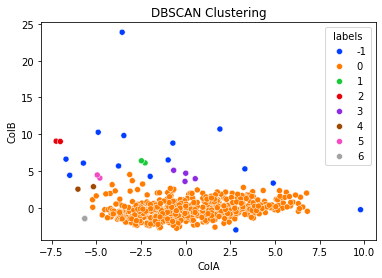

In [47]:
dbscan = DBSCAN(1, metric='euclidean', min_samples=2)
dbscan_clusters = dbscan.fit_predict(data[["ColA", "ColB"]])
data_res = data[["ColA", "ColB"]].copy()
data_res["labels"] = dbscan_clusters
labels = dbscan.labels_
# Number of clusters, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("Number of predicted clusters: " + str(n_clusters_))

sns.scatterplot(data=data_res,x="ColA",y='ColB', hue='labels', palette='bright').set(title="DBSCAN Clustering")

In [48]:
print("Outliers")
data_res[data_res["labels"] == -1]

Outliers


,ColA,ColB,labels
11,-3.451528,9.828003,-1
14,2.814219,-3.001012,-1
91,9.791050,-0.254133,-1
139,-6.690594,6.621169,-1
170,-3.750051,5.689427,-1
172,-3.546830,23.869528,-1
202,3.319060,5.292523,-1
287,-6.481695,4.426272,-1
313,-5.716874,6.082256,-1
320,-4.887989,10.277057,-1


In [49]:
data["labels"] = data_res.apply(lambda row: -1 if row["labels"] == -1 else 0, axis=1)

In [50]:
# Plotting the data
customdata = np.stack((data["BTS_ID"], data["labels"]), axis=-1)
fig = px.scatter(data_frame=data, x = "ColA", y = "ColB", color="labels")#, hover_data=["ColA", "ColB", "BTS_ID"])
hovertemplate = ('BTS_ID: %{customdata[0]}<br>' + 
    'ColA: %{x} <br>' + 
    'ColB: %{y} <br>' + 
    "labels: %{customdata[1]}"
    '<extra></extra>')
fig.update_traces(customdata=customdata, hovertemplate=hovertemplate)
fig.show()

## Part 3

In [51]:
# Now perform the same steps, but in every date except 2021-06-13
data = df.copy()
data["day"] = pd.to_datetime(data["day"])
data = data[data["day"] != "2021-06-13"].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107906 entries, 0 to 107905
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   day                                   107906 non-null  datetime64[ns]
 1   BTS_ID                                107906 non-null  object        
 2   RRC_Conn_Release_due_to_S1_Link_Fail  107906 non-null  float64       
 3   Max_Num_RRC_Conn_User                 107906 non-null  float64       
 4   Mean_RRC_Conn_Setup_Time_ms           107906 non-null  float64       
 5   Avg_PRACH_Usage_per_Second            107906 non-null  float64       
 6   FDD_Cell_DL_Avg_Agg_Thruput_Mbps      107906 non-null  float64       
 7   FDD_Cell_UL_Avg_Agg_Thruput_Mbps      107906 non-null  float64       
 8   FDD_Cell_DL_MAC_Data_Volume_MB        107906 non-null  float64       
 9   FDD_Cell_UL_MAC_Data_Volume_MB        107906 non-null  float64  

In [52]:
# Day column is dropped and BTS_ID column is saved to an external variable
BTS_ID = data[["BTS_ID"]]
BTS_ID = BTS_ID.reset_index()
data = data.drop(columns=["day", "BTS_ID"]).copy()
# Data is scaled
std_scaler = StandardScaler()
data = pd.DataFrame(std_scaler.fit_transform(data))
# Data dimensionality is reduced
pca_2 = PCA(n_components=2, random_state=42).fit(data)
pca_data = pca_2.transform(data)
# The BTS_ID variable is added back
data = pd.DataFrame(data = pca_data, columns=["ColA", "ColB"])
data = pd.concat([data, BTS_ID], axis=1)
data = data.drop(["index"], axis=1)

In [67]:
test = np.array((data["ColA"].iloc[0], data["ColB"].iloc[0])).reshape(-1,1)
test

array([[-1.8288782 ],
       [-1.33401073]])

In [79]:
center = np.array((0,0)).reshape(-1,1)
center

array([[0],
       [0]])

In [81]:
center = [(0,0)]
test = [(data["ColA"].iloc[0], data["ColB"].iloc[0])]

In [82]:
distance.cdist(test, center, "euclidean")

array([[2.26370936]])

In [54]:
center = np.array((0,0)).reshape(-1,1)
data["euclidean"] = data.apply(lambda x: distance.cdist(np.array((x["ColA"], x["ColB"])).reshape(-1,1), center, "euclidean"), axis=1)

In [83]:
center = np.array((0,0))
test = np.array((data["ColA"].iloc[0], data["ColB"].iloc[0]))
np.linalg.norm(test - center)
# data["euclidean"] = data.apply(lambda x: np.linalg.norm(np.array((x["ColA"], x["ColB"])) - center), axis=1)

2.263709363871843

In [19]:
# center = np.array((0,0))
# data["euclidean"] = data.apply(lambda x: np.linalg.norm(np.array((x["ColA"], x["ColB"])) - center), axis=1)

In [55]:
means = data.groupby("BTS_ID")["euclidean"].mean()
data["mean_BTS_euclidean"] = data.apply(lambda x: means[x["BTS_ID"]] ,axis=1)

In [56]:
# Compute the distance from the center of the plot for each BTS_ID using the "2021-06-13" data. 
data_13 = df.copy()
data_13["day"] = pd.to_datetime(data_13["day"])
data_13 = data_13[data_13["day"] == "2021-06-13"].copy()

In [57]:
# Day column is dropped and BTS_ID column is saved to an external variable
BTS_ID = data_13[["BTS_ID"]]
BTS_ID = BTS_ID.reset_index()
data_13 = data_13.drop(columns=["day", "BTS_ID"]).copy()
# Data is scaled
std_scaler = StandardScaler()
data_13 = pd.DataFrame(std_scaler.fit_transform(data_13))
# Data dimensionality is reduced
pca_2 = PCA(n_components=2, random_state=42).fit(data_13)
pca_data = pca_2.transform(data_13)
# The BTS_ID variable is added back
data_13 = pd.DataFrame(data = pca_data, columns=["ColA", "ColB"])
data_13 = pd.concat([data_13, BTS_ID], axis=1)
data_13 = data_13.drop(["index"], axis=1)

In [58]:
center = np.array((0,0)).reshape(-1,1)
data_13["euclidean"] = data_13.apply(lambda x: distance.cdist(np.array((x["ColA"], x["ColB"])).reshape(-1,1), center, "euclidean"), axis=1)

In [23]:
# center = np.array((0,0))
# data_13["euclidean"] = data_13.apply(lambda x: np.linalg.norm(np.array((x["ColA"], x["ColB"])) - center), axis=1)

In [62]:
data_13["euclidean"]

0      [[0.665554020935984, 0.665554020935984], [0.55...
1      [[0.13542909304121675, 0.13542909304121675], [...
2      [[1.6463451805465217, 1.6463451805465217], [0....
3      [[2.1819871558739625, 2.1819871558739625], [0....
4      [[1.122742646425574, 1.122742646425574], [0.15...
                             ...                        
588    [[2.390551866841269, 2.390551866841269], [0.16...
589    [[0.8516189543280932, 0.8516189543280932], [2....
590    [[0.9731096652997296, 0.9731096652997296], [6....
591    [[1.540313337121236, 1.540313337121236], [2.24...
592    [[2.750114194798433, 2.750114194798433], [1.74...
Name: euclidean, Length: 593, dtype: object

In [59]:
# Duplicates are deleted, as their average would be the same
data_13 = data_13.drop_duplicates(["BTS_ID"])
data_13

,ColA,ColB,BTS_ID,euclidean
0,0.665554,-0.558075,10-1,"[[0.665554020935984, 0.665554020935984], [0.55..."
1,0.135429,-0.456506,10-2,"[[0.13542909304121675, 0.13542909304121675], [..."
2,1.646345,-0.241883,100-1,"[[1.6463451805465217, 1.6463451805465217], [0...."
3,-2.181987,0.413157,100-2,"[[2.1819871558739625, 2.1819871558739625], [0...."
4,-1.122743,-0.155742,100-3,"[[1.122742646425574, 1.122742646425574], [0.15..."
...,...,...,...,...
588,-2.390552,-0.164755,944-3,"[[2.390551866841269, 2.390551866841269], [0.16..."
589,-0.851619,2.643008,950-1,"[[0.8516189543280932, 0.8516189543280932], [2...."
590,-0.973110,6.508833,950-2,"[[0.9731096652997296, 0.9731096652997296], [6...."
591,-1.540313,-2.242941,952-7,"[[1.540313337121236, 1.540313337121236], [2.24..."


In [64]:
average_data = data[["BTS_ID", "mean_BTS_euclidean"]].copy()
average_data.reset_index
average_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107906 entries, 0 to 107905
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   BTS_ID              107906 non-null  object
 1   mean_BTS_euclidean  107906 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [65]:
# Duplicates are deleted, as their average would be the same
average_data = average_data.drop_duplicates(["BTS_ID"])

In [66]:
analysis_data = average_data.copy()
analysis_data = analysis_data.merge(data_13[["BTS_ID" ,"euclidean"]], on="BTS_ID")
analysis_data

,BTS_ID,mean_BTS_euclidean,euclidean
0,10-1,"[[1.9129354722359184, 1.9129354722359184], [0....","[[0.665554020935984, 0.665554020935984], [0.55..."
1,10-2,"[[1.486740664556611, 1.486740664556611], [0.66...","[[0.13542909304121675, 0.13542909304121675], [..."
2,100-1,"[[2.128355086848899, 2.128355086848899], [0.39...","[[1.6463451805465217, 1.6463451805465217], [0...."
3,100-2,"[[1.90778013609076, 1.90778013609076], [0.5700...","[[2.1819871558739625, 2.1819871558739625], [0...."
4,100-3,"[[1.1785497069334225, 1.1785497069334225], [0....","[[1.122742646425574, 1.122742646425574], [0.15..."
...,...,...,...
588,944-3,"[[3.048678803860342, 3.048678803860342], [0.55...","[[2.390551866841269, 2.390551866841269], [0.16..."
589,950-1,"[[2.195363507287198, 2.195363507287198], [0.83...","[[0.8516189543280932, 0.8516189543280932], [2...."
590,950-2,"[[1.8194045615875345, 1.8194045615875345], [2....","[[0.9731096652997296, 0.9731096652997296], [6...."
591,952-7,"[[1.9148103622004187, 1.9148103622004187], [1....","[[1.540313337121236, 1.540313337121236], [2.24..."


In [28]:
# Differences are detected
analysis_data["status"] = analysis_data.apply(lambda x: "Worse" if x["euclidean"] > x["mean_BTS_euclidean"] else "Better" , axis = 1)
analysis_data

,BTS_ID,mean_BTS_euclidean,euclidean,status
0,10-1,2.144963,0.868568,Better
1,10-2,1.683660,0.476171,Better
2,100-1,2.237996,1.664019,Better
3,100-2,2.066586,2.220758,Worse
4,100-3,1.414100,1.133493,Better
...,...,...,...,...
588,944-3,3.134148,2.396223,Better
589,950-1,2.586101,2.776823,Worse
590,950-2,3.347709,6.581174,Worse
591,952-7,2.688604,2.720909,Worse


In [29]:
# Sites that have gotten better
analysis_data[analysis_data["status"] == "Better"]

,BTS_ID,mean_BTS_euclidean,euclidean,status
0,10-1,2.144963,0.868568,Better
1,10-2,1.683660,0.476171,Better
2,100-1,2.237996,1.664019,Better
4,100-3,1.414100,1.133493,Better
5,100-4,2.501134,0.987730,Better
...,...,...,...,...
582,942-2,2.959461,2.681187,Better
584,943-2,2.345726,1.885891,Better
585,943-3,2.707811,2.492828,Better
587,944-2,1.043570,0.856658,Better


In [30]:
# Average of difference
mean(analysis_data[analysis_data["status"] == "Better"].apply(lambda x: abs(x["mean_BTS_euclidean"] - x["euclidean"]) , axis = 1))

0.596973924524244

In [31]:
# Sites that have gotten worse
analysis_data[analysis_data["status"] == "Worse"]

,BTS_ID,mean_BTS_euclidean,euclidean,status
3,100-2,2.066586,2.220758,Worse
9,10119-2,1.612679,2.627777,Worse
10,10119-3,0.845899,1.097373,Worse
11,10238-1,7.838555,10.416463,Worse
13,10238-3,2.286858,2.452146,Worse
...,...,...,...,...
586,944-1,1.246872,1.970790,Worse
589,950-1,2.586101,2.776823,Worse
590,950-2,3.347709,6.581174,Worse
591,952-7,2.688604,2.720909,Worse


In [32]:
# Average of difference
mean(analysis_data[analysis_data["status"] == "Worse"].apply(lambda x: abs(x["mean_BTS_euclidean"] - x["euclidean"]) , axis = 1))

0.6999028538128642

## Question
Are the engineers making progress with the system performance?

If we take only the total number of sites that have improved, then yes, as 302 sites have gotten better while only 291 sites have gotten worse.
But if we take the averages of differences in the distances, we can see that the ones that have improved have done so with an average of only 0.59697, and the sites that have gotten worse have done so with an average of 0.69990

In [33]:
# Commented out as it consumes so much memory the notebook crashes
# dbscan = DBSCAN(1, metric='euclidean', min_samples=2, n_jobs = -2)
# dbscan_clusters = dbscan.fit_predict(data[["ColA", "ColB"]])
# data_res = data[["ColA", "ColB"]].copy()
# data_res["labels"] = dbscan_clusters
# labels = dbscan.labels_
# # Number of clusters, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# print ("Number of predicted clusters: " + str(n_clusters_))

# sns.scatterplot(data=data_res,x="ColA",y='ColB', hue='labels', palette='bright').set(title="DBSCAN Clustering")